In [2]:
import torch
import numpy as np
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
x_numpy, y_numpy=datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [4]:
x=torch.from_numpy(x_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0],1)

In [5]:
n_samples,n_features=x.shape

In [6]:
#model
input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)

In [10]:
#loss and optimizer
learning_rate=0.01
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

epoch: 9 , loss: 4.36e+03
epoch: 19 , loss: 3.25e+03
epoch: 29 , loss: 2.45e+03
epoch: 39 , loss: 1.87e+03
epoch: 49 , loss: 1.45e+03
epoch: 59 , loss: 1.15e+03
epoch: 69 , loss: 9.24e+02
epoch: 79 , loss: 7.63e+02
epoch: 89 , loss: 6.46e+02
epoch: 99 , loss: 5.61e+02


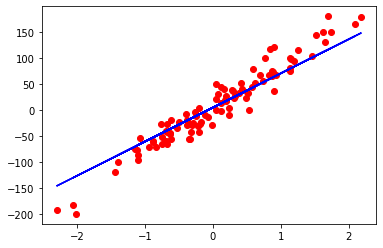

In [11]:
#traning loops
num_epoch=100
for epoch in range(num_epoch):

  #forward
  y_pred=model(x)
  loss=criterion(y_pred,y)


  #backward 
  loss.backward()
  #update
  optimizer.step()
  optimizer.zero_grad()

  if (epoch+1) % 10 ==0:
    print(f"epoch: {epoch} , loss: {loss.item():.3}")

#plot

predicted=model(x).detach().numpy()

plt.plot(x_numpy,y_numpy,"ro")
plt.plot(x_numpy, predicted, "b")
plt.show()
